## ADSA SGD Task 2: Digit Recogniser

In this task we will take images of numbers 1 to 9, and attempt to create an algorithm to classify each number. 

Helpful information can be found at the following link: 
https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

The basic structure is as follows
1. Introduction

2. Data preparation
<br>2.1 Load data
<br>2.2 Check for null and missing values
<br>2.3 Normalization
<br>2.4 Reshape
<br>2.5 Label encoding
<br>2.6 Split training and valdiation set

3. CNN
<br>3.1 Define the model
<br>3.2 Set the optimizer and annealer
<br>3.3 Data augmentation

4. Evaluate the model
<br>4.1 Training and validation curves
<br>4.2 Confusion matrix

5. Prediction and submition
<br>5.1 Predict and Submit results

## Intro


We are going to use the Keras library, with 2 epochs. 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

## Section 2: Data Preparation

In [79]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

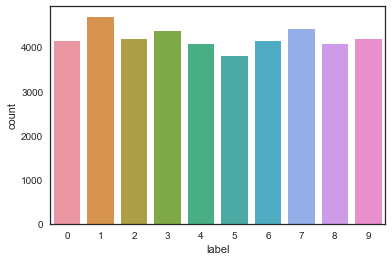

In [80]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

## 2.2 Check for null values

In [81]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [82]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

There is no missing values in the train and test dataset. So we can safely go ahead.

## 2.3: Normalisation

divide all data by 255 -> grayscale normalisation

In [83]:
X_train = X_train / 255.0
test = test / 255.0

reshape data to 3 dimensions

In [84]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

In [85]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

In [86]:
# Set the random seed
random_seed = 2

## 2.6

In [87]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

We chose to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

Since we have 42 000 training images of balanced labels (see 2.1 Load data), a random split of the train set doesn't cause some labels to be over represented in the validation set. Be carefull with some unbalanced dataset a simple random split could cause inaccurate evaluation during the validation.

To avoid that, you could use stratify = True option in train_test_split function (Only for >=0.17 sklearn versions).